# Hackathon Project

# Overview: 

- Scrape data from Amazon, Jumia, or any other e-commerce website to create a list of all products currently offered at a discount.

- Tools, Frameworks, and Technologies: Python, Beautiful Soup, Selenium, Scrapy, Pandas, Numpy.

- From the project you can perform EDA on the data and even build a UI page where you can list these items using flask, fast api, streamlit, dash, or any other tool of your choice.

In [79]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [3]:
!pip install selenium

In [5]:
# Configure Chrome options
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run headless Chrome for scraping without GUI
chrome_options.add_argument("--disable-gpu")

In [11]:
# Set up the Chrome driver
driver_service = Service(r'C:\Users\Ms-Echo\Downloads\chromedriver-win64\chromedriver-win64\chromedriver.exe')  # Update with your path to chromedriver
driver = webdriver.Chrome(service=driver_service, options=chrome_options)

In [14]:
# Open Jumia Tech Week page
driver.get('https://www.jumia.co.ke/mlp-tech-week/')

In [15]:
# Wait for products to load
wait = WebDriverWait(driver, 10)
wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'article.prd._fb.col.c-prd')))

[<selenium.webdriver.remote.webelement.WebElement (session="9ace4b8e1cf41d13afc09b0228de821b", element="f.2833B01AE22EA20AB0D11E8FA9085874.d.C2FA5373CF62D7985FAC43F2090053EE.e.90")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9ace4b8e1cf41d13afc09b0228de821b", element="f.2833B01AE22EA20AB0D11E8FA9085874.d.C2FA5373CF62D7985FAC43F2090053EE.e.91")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9ace4b8e1cf41d13afc09b0228de821b", element="f.2833B01AE22EA20AB0D11E8FA9085874.d.C2FA5373CF62D7985FAC43F2090053EE.e.92")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9ace4b8e1cf41d13afc09b0228de821b", element="f.2833B01AE22EA20AB0D11E8FA9085874.d.C2FA5373CF62D7985FAC43F2090053EE.e.93")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9ace4b8e1cf41d13afc09b0228de821b", element="f.2833B01AE22EA20AB0D11E8FA9085874.d.C2FA5373CF62D7985FAC43F2090053EE.e.94")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9ace4b8e1cf41d13afc09b022

In [16]:
# Extract page source and parse with BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [17]:
# Close the driver
driver.quit()

In [28]:
# Extract product details
products = soup.find_all('article', class_='prd _fb col c-prd')
data = []

for product in products:
    try:
        title = product.find('h3', class_='name').text.strip()
    except:
        title = None

    try:
        price = product.find('div', class_='prc').text.strip()
    except:
        price = None

    try:
        old_price = product.find('div', class_='old').text.strip() if product.find('div', class_='old') else None
    except:
        old_price = None

    try:
        discount = product.find('div', class_='bdg _dsct _sm').text.strip() if product.find('div', class_='bdg _dsct _sm') else None
    except:
        discount = None

    try:
        rating = product.find('div', class_='stars _s').text.strip() if product.find('div', class_='stars _s') else None
    except:
        rating = None

    product_data = {
        'title': title,
        'price': price,
        'old_price': old_price,
        'discount': discount,
        'rating': rating
    }
    data.append(product_data)

In [19]:
# Convert to DataFrame and save to CSV
df = pd.DataFrame(data)
df.to_csv('jumia_techweek_products.csv', index=False)

In [53]:
df.head()

,title,price,old_price,discount,rating
0,AILYONS HD-199A Electric Dry Iron Box Silver &...,KSh 929,"KSh 1,399",34%,3.8 out of 5
1,RichRipple LED Display Bluetooth Headsets 9D S...,KSh 519,KSh 920,44%,3.7 out of 5
2,"Vitron HTC4388FS - 43"" Smart Android Frameless...","KSh 19,799","KSh 28,599",31%,3.9 out of 5
3,AILYONS FK-0310 Stainless Steel 2.2L Electric ...,KSh 902,"KSh 1,599",44%,3.9 out of 5
4,Hikers 32'' Inch Frameless Android Smart HD LE...,"KSh 11,328","KSh 20,168",44%,4 out of 5


In [21]:
# Check for the shape of the dataset
df.shape

(40, 5)

In [54]:
df['discount'].head(20)

0     34%
1     44%
2     31%
3     44%
4     44%
5     34%
6     55%
7     35%
8     33%
9     39%
10    47%
11    48%
12    38%
13    45%
14    30%
15    24%
16    30%
17    47%
18    40%
19    45%
Name: discount, dtype: object

In [25]:
df.columns

Index(['title', 'price', 'old_price', 'discount', 'rating'], dtype='object')

In [58]:
# Convert columns to strings first to avoid AttributeError
df['price'] = df['price'].astype(str).str.replace('KSh', '').str.replace(',', '').astype(float)
df['old_price'] = df['old_price'].astype(str).str.replace('KSh', '').str.replace(',', '').astype(float)
df['discount'] = df['discount'].astype(str).str.replace('%', '').astype(float)

In [59]:
# Display more information on the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      40 non-null     object 
 1   price      40 non-null     float64
 2   old_price  40 non-null     float64
 3   discount   40 non-null     float64
 4   rating     40 non-null     object 
dtypes: float64(3), object(2)
memory usage: 1.7+ KB


In [60]:
#Check for missing values
df.isnull().sum()

title        0
price        0
old_price    0
discount     0
rating       0
dtype: int64

In [61]:
df.duplicated().sum()

0

In [62]:
#Check for Discriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,40.0,6026.900,8839.800798,245.0,507.25,1239.5,11599.50,45500.0
old_price,40.0,10236.075,17613.144592,450.0,928.25,1899.5,16479.75,100000.0
discount,40.0,38.650,11.051279,5.0,34.00,42.0,46.25,55.0


In [63]:
df.describe(include ='object').T

,count,unique,top,freq
title,40,37,RichRipple Pro3 Bluetooth Headsets Wireless Po...,3
rating,40,10,4.2 out of 5,8


### Univariate Analysis--Creates frequency tables to understand the distribution of values within each categorical column.

In [64]:
df['title'].value_counts()

title
RichRipple Pro3 Bluetooth Headsets Wireless Pods Pro Earpods Earphones                                       3
Ace Elec ACEELEC F9 Wireless Fingerprint Touch Bluetooth Headset                                             2
Samsung Galaxy A15, 6.5'' Display, 4GB RAM + 128GB ROM (Dual Sim) 50MP,  5000mAh - Blue(2YRs WRTY)           1
Stereo F9 Bluetooth Earphone  Power Headset                                                                  1
XIAOMI Redmi 13C, 6.71"(4GB RAM+128GB Storage)5000mAh Dual Sim-Black                                         1
Itel ISW-O11 Waterproof Native Storm  Smart Watch                                                            1
TWS Bluetooth Earphones Sports Wireless Headphones With Mic                                                  1
Skilltech 15" To 43" Tilting Wall Mount Bracket                                                              1
Amaze Fridge/Freezer Guard-UnderVoltage&Surge Protection                                                  

In [65]:
df.apply(lambda x: len(x.unique()))

title        37
price        38
old_price    32
discount     20
rating       10
dtype: int64

In [66]:
df['price'].value_counts()

price
902.0      2
499.0      2
929.0      1
10259.0    1
13349.0    1
1550.0     1
420.0      1
533.0      1
599.0      1
245.0      1
15499.0    1
13199.0    1
492.0      1
1820.0     1
11901.0    1
4569.0     1
480.0      1
380.0      1
650.0      1
510.0      1
390.0      1
519.0      1
738.0      1
19799.0    1
11328.0    1
45500.0    1
1699.0     1
12180.0    1
11499.0    1
15678.0    1
557.0      1
1599.0     1
406.0      1
13995.0    1
5780.0     1
2298.0     1
16450.0    1
475.0      1
Name: count, dtype: int64

In [31]:
df['old_price'].value_counts()

old_price
KSh 1,399      2
KSh 2,599      2
KSh 1,000      2
KSh 700        2
KSh 20,000     2
KSh 29,999     2
KSh 826        2
KSh 1,599      2
KSh 100,000    1
KSh 13,990     1
KSh 1,249      1
KSh 550        1
KSh 8,999      1
KSh 13,000     1
KSh 2,999      1
KSh 15,950     1
KSh 450        1
KSh 28,599     1
KSh 800        1
KSh 2,200      1
KSh 932        1
KSh 18,069     1
KSh 1,009      1
KSh 920        1
KSh 30,999     1
KSh 3,299      1
KSh 7,599      1
KSh 20,168     1
KSh 734        1
KSh 754        1
KSh 18,999     1
KSh 931        1
Name: count, dtype: int64

In [67]:
df['discount'].value_counts()

discount
44.0    5
48.0    4
34.0    3
47.0    3
40.0    3
30.0    3
45.0    3
39.0    2
46.0    2
49.0    2
33.0    1
38.0    1
35.0    1
55.0    1
24.0    1
31.0    1
5.0     1
36.0    1
8.0     1
13.0    1
Name: count, dtype: int64

In [91]:
df['rating'].value_counts

<bound method IndexOpsMixin.value_counts of 0     3.8 out of 5
1     3.7 out of 5
2     3.9 out of 5
3     3.9 out of 5
4       4 out of 5
5     4.1 out of 5
6     4.8 out of 5
7     4.1 out of 5
8       4 out of 5
9     4.1 out of 5
10      4 out of 5
11    4.2 out of 5
12      4 out of 5
13    4.4 out of 5
14    4.2 out of 5
15      4 out of 5
16    4.1 out of 5
17    4.2 out of 5
18      4 out of 5
19    3.9 out of 5
20    4.1 out of 5
21    3.8 out of 5
22    4.2 out of 5
23    3.8 out of 5
24    4.3 out of 5
25    4.2 out of 5
26    3.9 out of 5
27    4.2 out of 5
28    4.2 out of 5
29    4.1 out of 5
30    4.4 out of 5
31    3.9 out of 5
32    4.2 out of 5
33    4.1 out of 5
34    3.9 out of 5
35    3.8 out of 5
36      4 out of 5
37    3.9 out of 5
38    3.8 out of 5
39    4.5 out of 5
Name: rating, dtype: object>

In [81]:

# Streamlit app
st.title('Jumia Tech Week Products Dashboard')

DeltaGenerator()

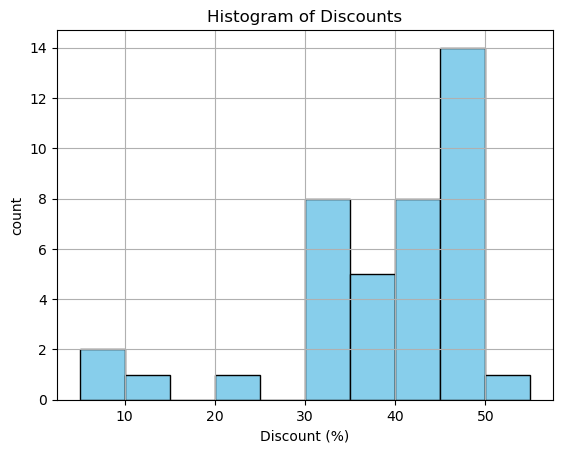

In [93]:
plt.hist(df['discount'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Discounts')
plt.xlabel('Discount (%)')
plt.ylabel('count')
plt.grid(True)
plt.show()


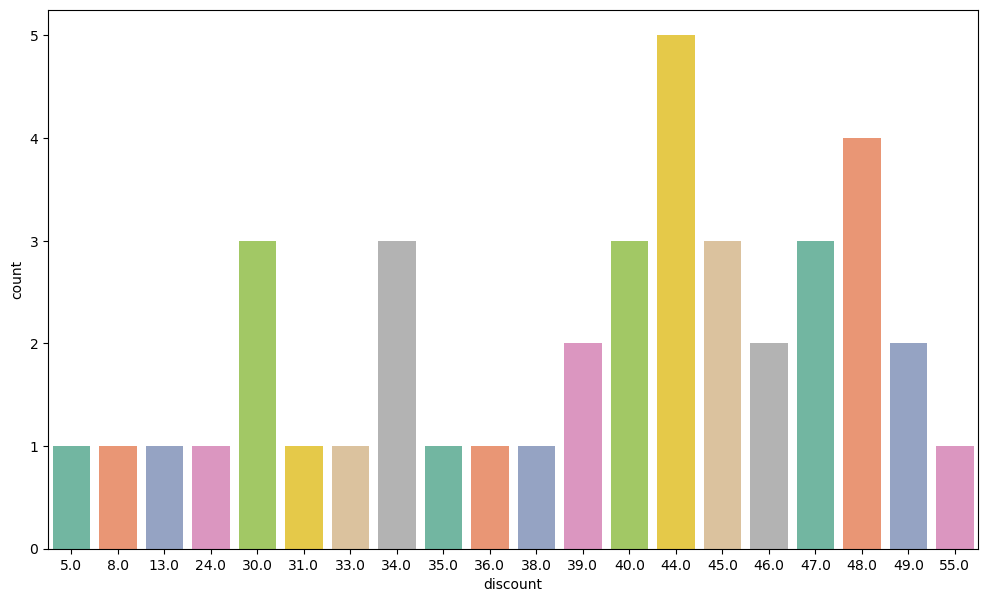

In [94]:
plt.figure(figsize = (12,7))
sns.countplot(x='discount', data=df, palette='Set2')
plt.xlabel('discount')
plt.ylabel('count')
plt.show()

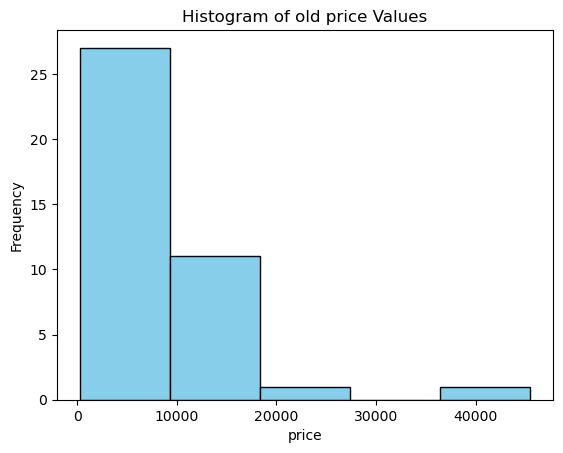

In [85]:
plt.hist(df['price'], bins=5, color='skyblue', edgecolor='black')
plt.title('Histogram of old price Values')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

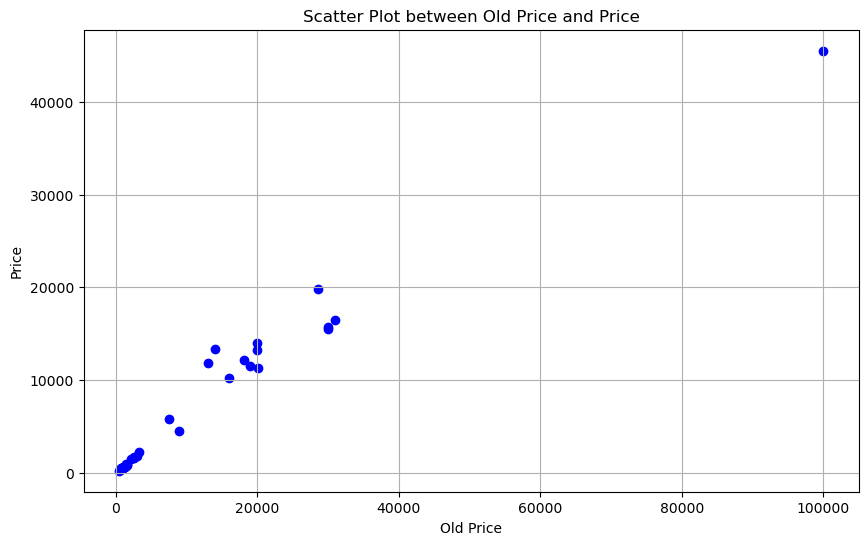

In [92]:
# Plot scatter plot of old price vs new price
plt.figure(figsize=(10, 6))
# Scatter Plot
plt.scatter(df['old_price'], df['price'], color='blue')
plt.title('Scatter Plot between Old Price and Price')
plt.xlabel('Old Price')
plt.ylabel('Price')
plt.grid(True)
plt.show()

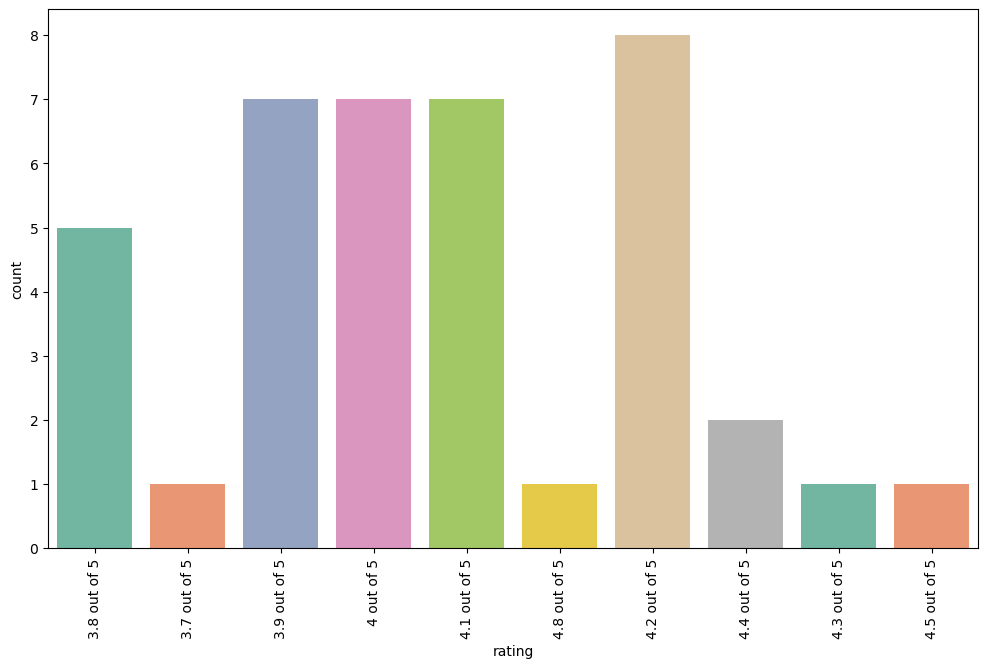

In [72]:
plt.figure(figsize = (12,7))
sns.countplot(x='rating', data=df, palette='Set2')
plt.xlabel('rating')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

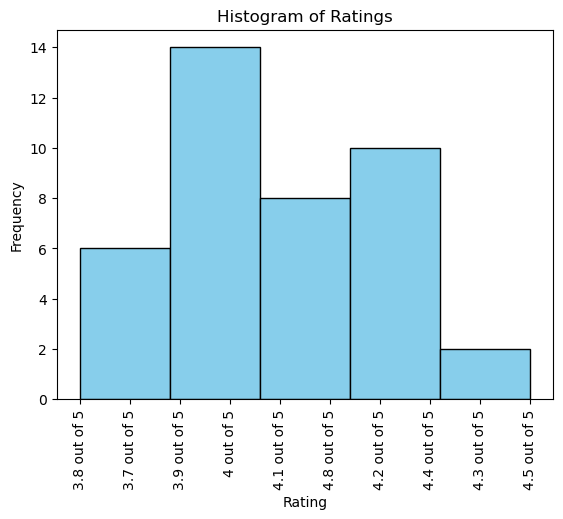

In [96]:
# Histogram
plt.hist(df['rating'], bins=5, color='skyblue', edgecolor='black')
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.show()

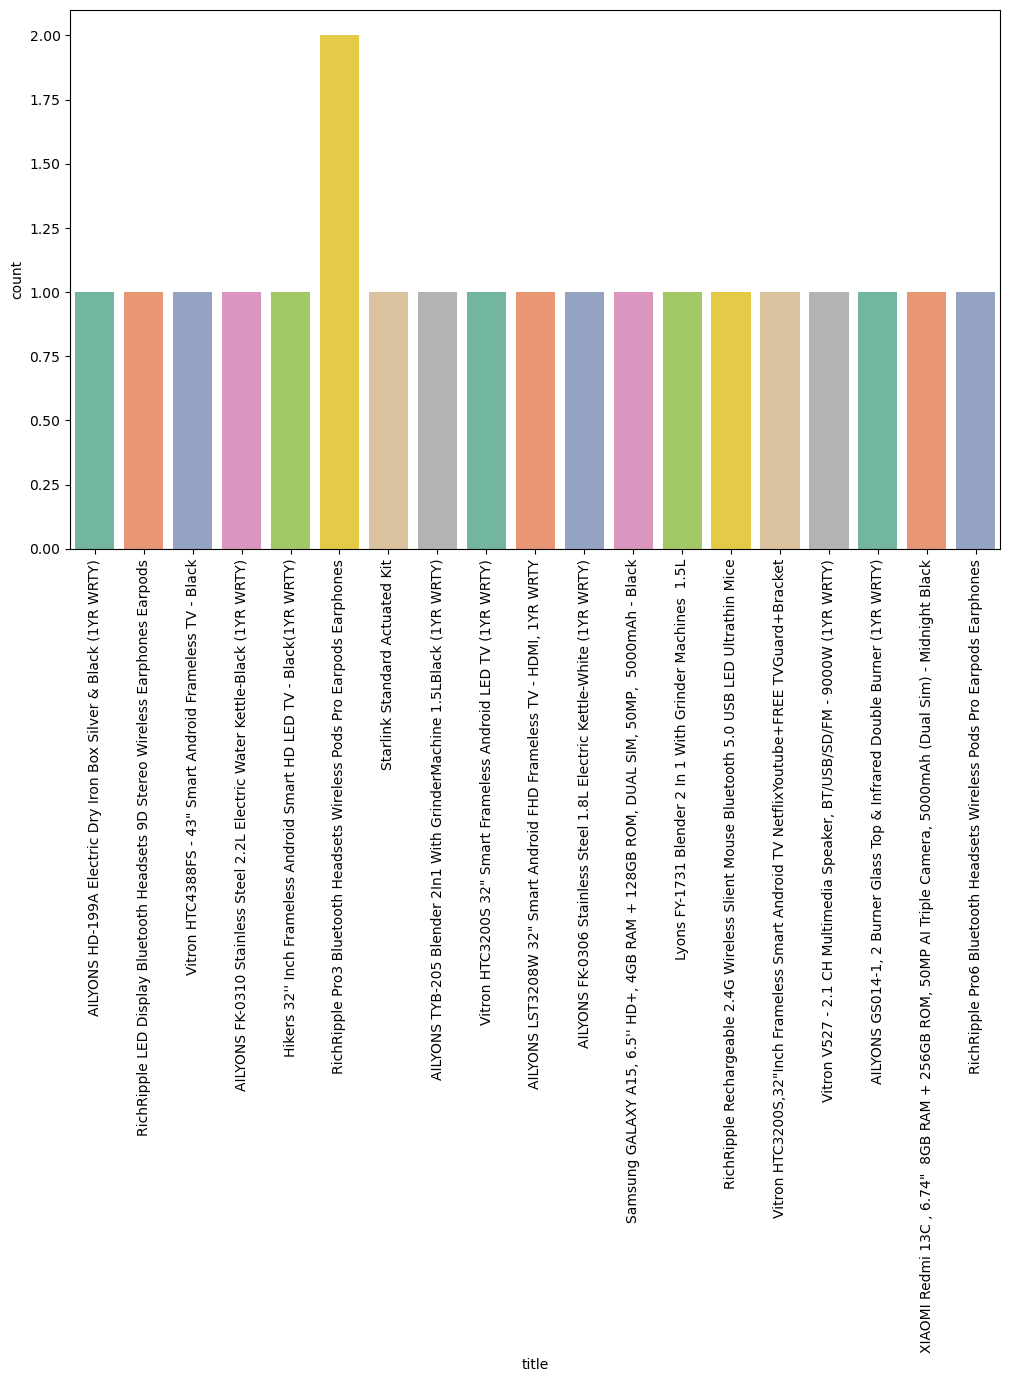

In [73]:
plt.figure(figsize = (12,7))
sns.countplot(x='title', data=df.head(20), palette='Set2')
plt.xlabel('title')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()